In [1]:
import numpy as np
import matplotlib.pyplot as plt

import symmetric_methods as sm


In [2]:
# MLP structure

L = 2

dim = np.zeros((L+1,))

dim[0] = 100
dim[1] = 75
dim[2] = 50
#dim[3] = 75
#dim[4] = 100
#dim[5] = 8
#dim[6] = 9
#dim[7] = 10
#dim[8] = 11
#dim[9] = 12

dim= dim.astype(int)


In [3]:
# draw random parameters, generate matrix and make it positive definite 

phi = np.random.normal(0,1,(L-2,))
PHI1 = np.random.normal(0,1,(dim[0],dim[0]))
PHI1 = PHI1 + PHI1.T
PHIL = np.random.normal(0,1,(dim[L],dim[L]))
PHIL = PHIL + PHIL.T
PSI1 = []
if L==2:
    PSI1 = np.random.normal(0,1,(dim[0],dim[2]))

phi_2,PHI1_2,PSI1_2,PHIL_2 = sm.matmat(L,dim,phi,PHI1,PSI1,PHIL,phi,PHI1,PSI1,PHIL)
phi_sqrt,PHI1_sqrt,PSI1_sqrt,PHIL_sqrt = sm.squareroot(L,dim,phi_2,PHI1_2,PSI1_2,PHIL_2)
sqrtcovg2 = sm.par2cov(L,dim,phi_sqrt,PHI1_sqrt,PSI1_sqrt,PHIL_sqrt)


In [4]:
# test the grad2par function with approximate estimation (a small set of R vectors)

R = 1

npar = 0
for iL in np.arange(0,L):
    npar = npar + dim[iL] * dim[iL+1]
npar = npar.astype(int)
    
grad = np.random.normal(0.,1.,(npar,R))

grad = sqrtcovg2 @ grad

phiest2,PHI1est2,PSI1est2,PHILest2 = sm.grad2par(L,dim,grad)



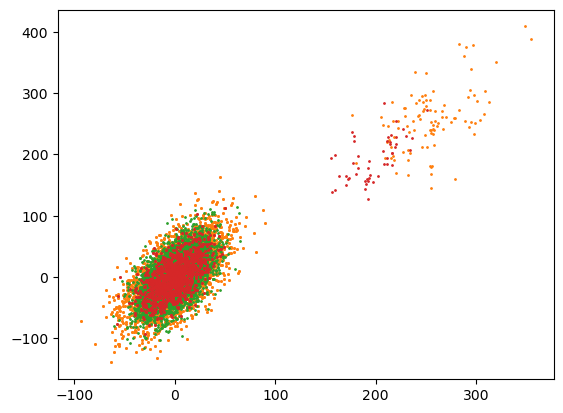

[]


[]


[[229.50649229 -11.0040036    4.55083362 ... -21.20416049 -20.22119898
   15.82730547]
 [-11.0040036  258.34873092   7.44462648 ... -12.46255751 -29.34684033
    3.87881764]
 [  4.55083362   7.44462648 267.53697341 ... -24.22560148  -7.7256199
   31.03150781]
 ...
 [-21.20416049 -12.46255751 -24.22560148 ... 312.86282773  30.83586457
   35.96018057]
 [-20.22119898 -29.34684033  -7.7256199  ...  30.83586457 248.83334499
  -12.88404281]
 [ 15.82730547   3.87881764  31.03150781 ...  35.96018057 -12.88404281
  354.85180762]]


[[274.91279747 -24.12234229  75.172835   ... -57.73431942 -47.38683286
   13.73805101]
 [-24.12234229 239.51960796   4.86723363 ... -31.06603727 -52.38628627
    6.00785256]
 [ 75.172835     4.86723363 280.53073003 ...   2.59005072  -1.25686329
   15.45207847]
 ...
 [-57.73431942 -31.06603727   2.59005072 ... 284.95990237  77.24493029
   48.61382253]
 [-47.38683286 -52.38628627  -1.25686329 ...  77.24493029 297.33272994
  -19.54620031]
 [ 13.73805101   6.00

In [5]:

#plt.plot(covg2,covg2est,linestyle='none',marker='.')
#plt.plot([np.min(covg2), np.max(covg2)],[np.min(covg2), np.max(covg2)])
#plt.show()

plt.scatter(phi_2,phiest2,s=1)
plt.scatter(PHI1_2,PHI1est2,s=1)
plt.scatter(PSI1_2,PSI1est2,s=1)
plt.scatter(PHIL_2,PHILest2,s=1)
#plt.plot([-100, 300],[-100, 300])
plt.show()


print(phi_2)
print('\n')
print(phiest2)
print('\n')
print(PHI1_2)
print('\n')
print(PHI1est2)
print('\n')
print(PSI1_2)
print('\n')
print(PSI1est2)
print('\n')
print(PHIL_2)
print('\n')
print(PHILest2)

